In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

dir_ = './wave2process/tdx_wave_0726/wave_csv_138/'
df = pd.read_csv(dir_ + 'wave_0726_22-01-38.csv', index_col=0)
df

,TimeStamp,seconds,wave,bre_freq
0,1.690380e+09,0.000000,10333,17
1,1.690380e+09,0.029920,10347,17
2,1.690380e+09,0.075016,10358,17
3,1.690380e+09,0.150065,10368,17
4,1.690380e+09,0.180081,10375,17
...,...,...,...,...
595,1.690380e+09,29.730034,10387,20
596,1.690380e+09,29.774954,10380,20
597,1.690380e+09,29.835370,10374,20
598,1.690380e+09,29.880720,10366,20


/tmp/ipykernel_27671/987691670.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

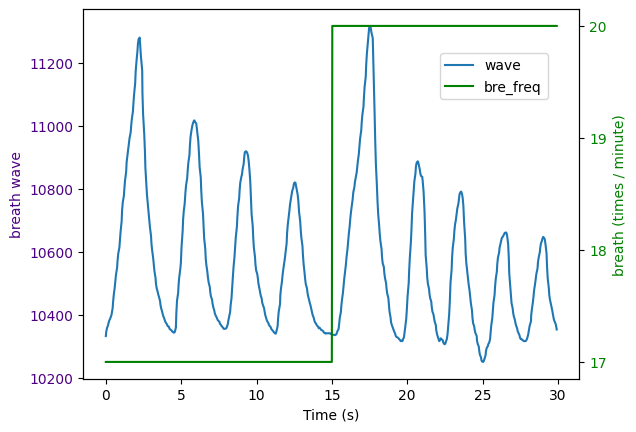

In [2]:
plt.figure()
fig, ax = plt.subplots()
lns1 = ax.plot(df['seconds'], df['wave'], label = 'wave')
ax2 = ax.twinx()
lns2 = ax2.plot(df['seconds'], df['bre_freq'], label = 'bre_freq', color='green')
ax.legend(lns1+lns2, [l.get_label() for l in lns1+lns2], bbox_to_anchor=(.95, .9))

ax.set_xlabel('Time (s)')
ax.set_ylabel('breath wave', color='indigo')
ax.tick_params(axis='y', labelcolor='indigo')
y_major_ax2 = MultipleLocator(1)
ax2.yaxis.set_major_locator(y_major_ax2)# ax=plt.gca()
ax2.set_ylabel('breath (times / minute)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
fig.show()

In [3]:
import numpy as np
datas = np.load(dir_+'/rx_4_230726_220108.npz')
# datas = np.load('./wave2process/tdx_wave_0725/wave_csv_032/rx_4_230725_151423.npz')
print(datas.files)
Timestamp = datas['Timestamp']
SubcarrierIndex = datas['SubcarrierIndex']
Csi = datas['Csi']
RSSI = datas['RSSI']
noiseFloor = datas['noiseFloor']
Num_Tx = int(datas['Num_Tx'])
Num_Rx = int(datas['Num_Rx'])
centerFrequency = int(datas['centerFrequency'])
channelBandWidth = int(datas['channelBandWidth'])
Mag = np.abs(Csi)
Phase = np.angle(Csi, deg=True)
Num_Ts = Timestamp.size
Num_Sc = SubcarrierIndex.size
Seconds = Timestamp - Timestamp[0]

['Timestamp', 'SubcarrierIndex', 'Csi', 'RSSI', 'noiseFloor', 'Num_Tx', 'Num_Rx', 'centerFrequency', 'channelBandWidth']


/tmp/ipykernel_27671/865885974.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

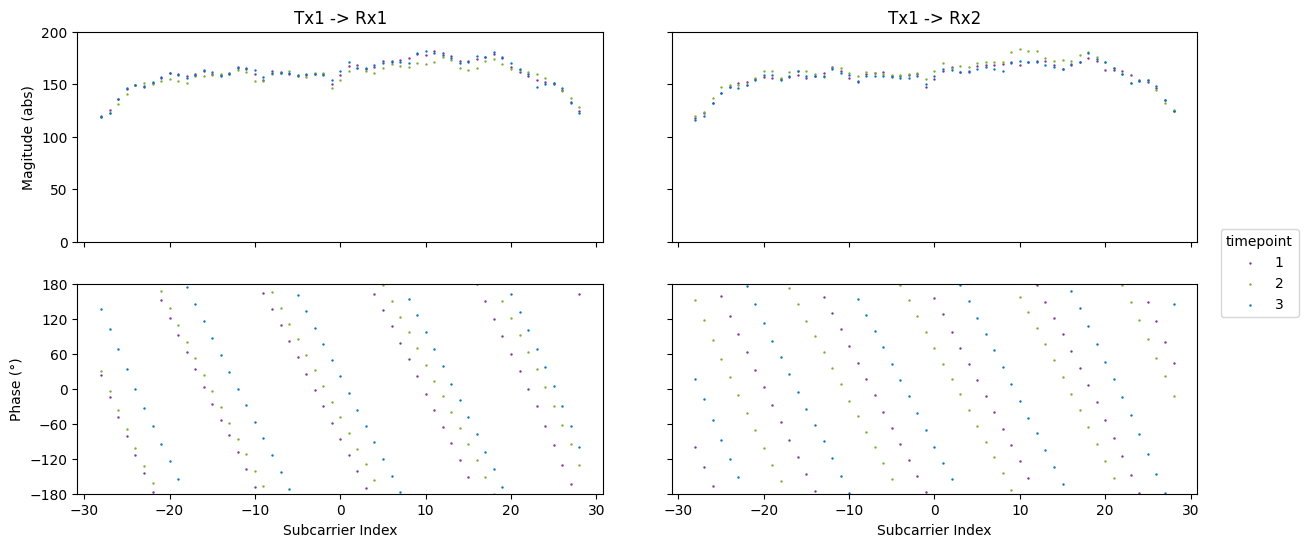

In [4]:
import matplotlib as mpl
import math
from matplotlib.pyplot import MultipleLocator
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#7E2F8E','#77AC30','#0072BD','#EDB120','#d62728','#17becf','#7f7f7f'])# #8c564b #e377c2 #bcbd22
y_major_locator_Mag = MultipleLocator(50)
y_major_locator_Pha = MultipleLocator(60)
y_major_locator_RSSI = MultipleLocator(1)

Num_plotTs = 3
Ylim_max_mag = math.ceil( Mag[Num_Ts-Num_plotTs:Num_Ts].max() /100 )*100
Ylim_max_pha = math.ceil( Phase[Num_Ts-Num_plotTs:Num_Ts].max() /10 )*10
plt.figure()
fig, axs = plt.subplots(2, Num_Tx*Num_Rx, sharex='col', sharey='row', figsize=(14,6))#figsize=(14,7)
axs[0][0].yaxis.set_major_locator(y_major_locator_Mag)# ax=plt.gca()
axs[1][0].yaxis.set_major_locator(y_major_locator_Pha)# ax=plt.gca()
axs[0][0].set_ylim([0,Ylim_max_mag])
axs[1][0].set_ylim([-Ylim_max_pha,Ylim_max_pha])

for ts in range(Num_Ts-Num_plotTs, Num_Ts  ): #      -Num_plotTs+1
    for txid in range(Num_Tx):
        for rxid in range(Num_Rx):
            axs[0][txid*Num_Rx + rxid].scatter(SubcarrierIndex, Mag[ts][txid][rxid][:], s=.5)
            axs[0][txid*Num_Rx + rxid].set_title('Tx'+str(txid+1)+' -> Rx'+str(rxid+1))
            axs[1][txid*Num_Rx + rxid].scatter(SubcarrierIndex, Phase[ts][txid][rxid][:], s=.5)
            axs[1][txid*Num_Rx + rxid].set_xlabel('Subcarrier Index')
        axs[0][txid * Num_Rx].set_ylabel('Magitude (abs)')
        axs[1][txid * Num_Rx].set_ylabel('Phase (°)')
fig.legend(labels=[i for i in range(1,1+Num_plotTs)], loc="right", title = 'timepoint')
fig.subplots_adjust(wspace=0.13,hspace=0.2,right=0.925) # left=0.1,bottom=0.1,right=0.9,top=0.9,
fig.show()

/tmp/ipykernel_27671/170302808.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

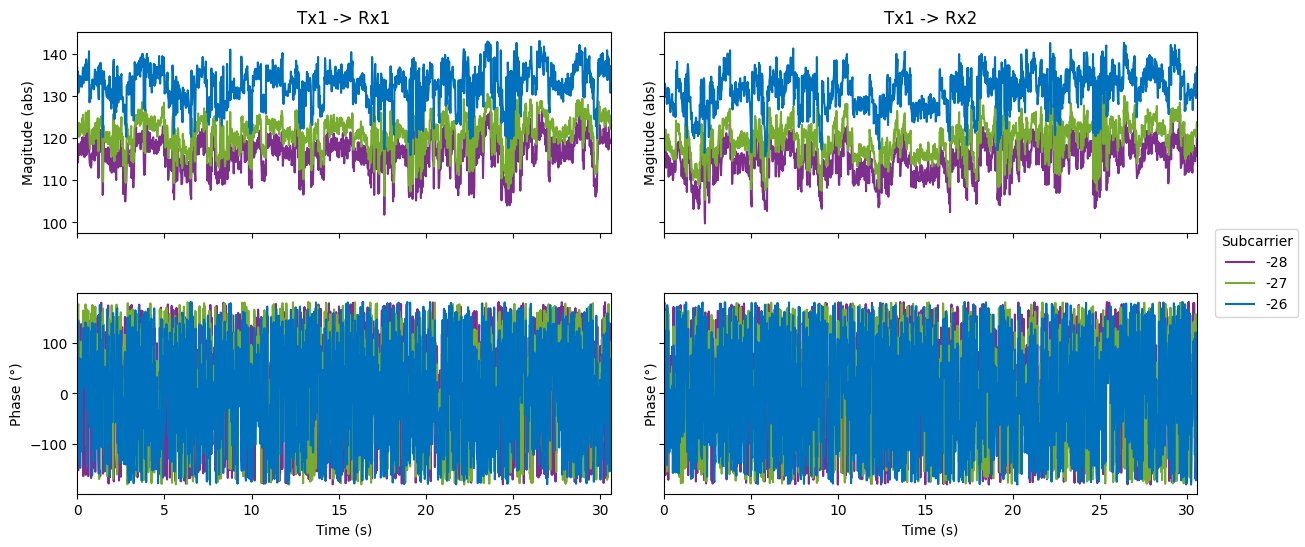

In [5]:
sc_plot = [-28, -26]
sc_plot[1] += 1
scid_plot = [i+SubcarrierIndex[-1] for i in sc_plot]
plt.figure()
fig, axs = plt.subplots(Num_Tx*2, Num_Rx, sharex='col', sharey='row', figsize=(14,6))#figsize=(14,7)
for sc in range(scid_plot[0], scid_plot[1]): #      -Num_plotTs+1
    for rxid in range(Num_Rx):
        for txid in range(Num_Tx):
            axs[txid*2,rxid].plot(Seconds, Mag[:,txid,rxid,sc])
            axs[txid*2+1,rxid].plot(Seconds, Phase[:,txid,rxid,sc])
            axs[txid*2,rxid].set_title('Tx'+str(txid+1)+' -> Rx'+str(rxid+1))
            axs[txid*2,rxid].set_ylabel('Magitude (abs)')
            axs[txid*2+1,rxid].set_ylabel('Phase (°)')
        axs[Num_Tx*2-1,rxid].set_xlabel('Time (s)')
        axs[Num_Tx*2-1,rxid].set_xlim([min(Seconds),(max(Seconds))])

fig.legend(labels=[i for i in range(sc_plot[0],sc_plot[1])], loc="right", title='Subcarrier')
fig.subplots_adjust(wspace=0.1,hspace=0.3,right=0.925) # left=0.1,bottom=0.1,right=0.9,top=0.9,
fig.show()

/tmp/ipykernel_27671/1807416096.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_27671/1807416096.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

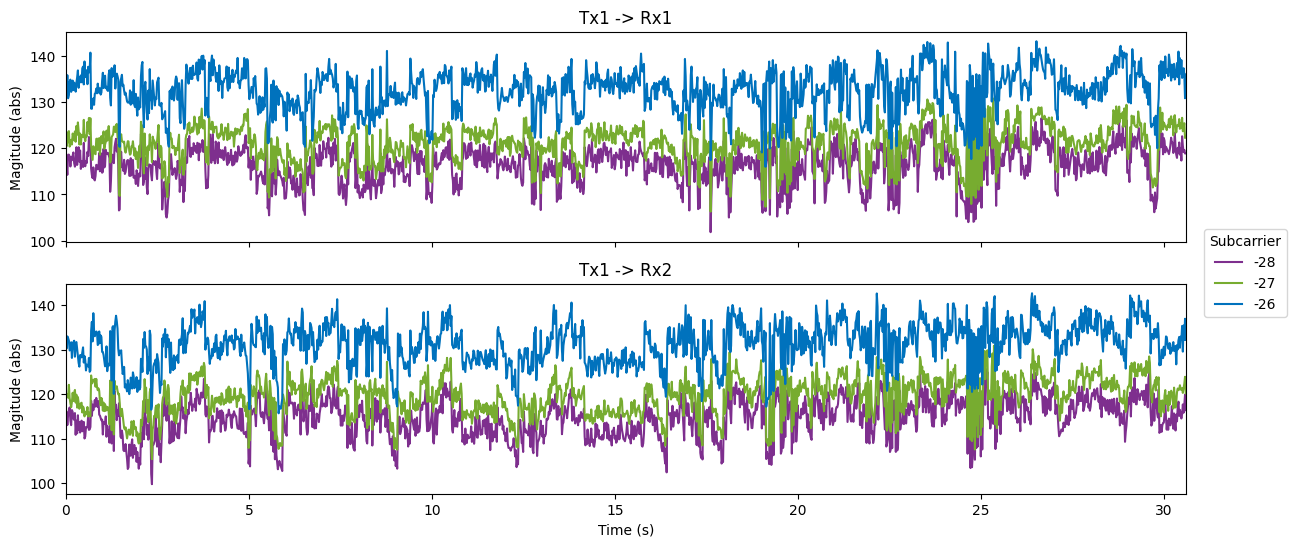

<Figure size 640x480 with 0 Axes>

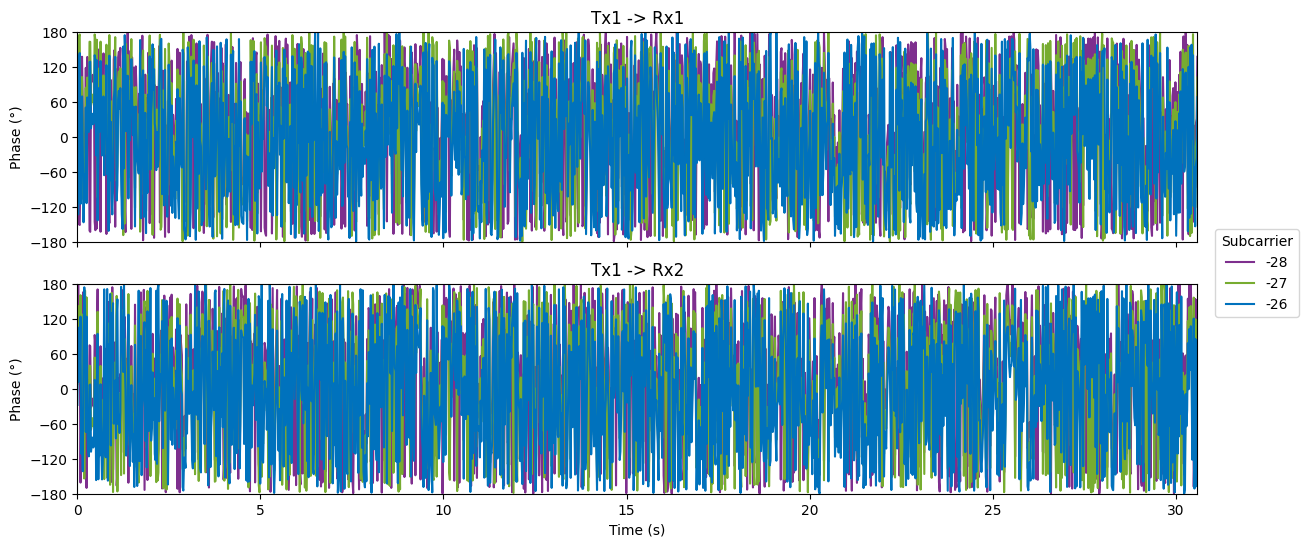

In [6]:
sc_plot = [-28, -26]
sc_plot[1] += 1
scid_plot = [i+SubcarrierIndex[-1] for i in sc_plot]
plt.figure()
fig, axs = plt.subplots(Num_Tx*Num_Rx, 1, sharex='col', sharey='row', figsize=(14,6))#figsize=(14,7)
for sc in range(scid_plot[0], scid_plot[1]): #      -Num_plotTs+1
    for txid in range(Num_Tx):
        for rxid in range(Num_Rx):
            axs[txid*Num_Rx+rxid].plot(Seconds, Mag[:,txid,rxid,sc])
            axs[txid*Num_Rx+rxid].set_title('Tx'+str(txid+1)+' -> Rx'+str(rxid+1))
            axs[txid*Num_Rx+rxid].set_ylabel('Magitude (abs)')
            axs[txid*Num_Rx+Num_Rx-1].set_xlabel('Time (s)')
            axs[txid*Num_Rx+Num_Rx-1].set_xlim([min(Seconds),(max(Seconds))])
fig.legend(labels=[i for i in range(sc_plot[0],sc_plot[1])], loc="right", title = 'Subcarrier')
fig.subplots_adjust(wspace=0.1,hspace=0.2,right=0.925) # left=0.1,bottom=0.1,right=0.9,top=0.9,
fig.show()

plt.figure()
fig, axs = plt.subplots(Num_Tx*Num_Rx, 1, sharex='col', sharey='col', figsize=(14,6))#figsize=(14,7)
for sc in range(scid_plot[0], scid_plot[1]): #      -Num_plotTs+1
    for txid in range(Num_Tx):
        for rxid in range(Num_Rx):
            axs[txid*Num_Rx+rxid].plot(Seconds, Phase[:,txid,rxid,sc])
            axs[txid*Num_Rx+rxid].set_title('Tx'+str(txid+1)+' -> Rx'+str(rxid+1))
            axs[txid*Num_Rx+rxid].set_ylabel('Phase (°)')
            axs[txid*Num_Rx+Num_Rx-1].set_xlabel('Time (s)')
            axs[txid*Num_Rx+Num_Rx-1].set_xlim([min(Seconds),(max(Seconds))])
            axs[txid*Num_Rx+Num_Rx-1].yaxis.set_major_locator(y_major_locator_Pha)# ax=plt.gca()
            axs[txid*Num_Rx+Num_Rx-1].set_ylim([-180, 180])
fig.legend(labels=[i for i in range(sc_plot[0],sc_plot[1])], loc="right", title = 'Subcarrier')
fig.subplots_adjust(wspace=0.1,hspace=0.2,right=0.925) # left=0.1,bottom=0.1,right=0.9,top=0.9,
fig.show()


/tmp/ipykernel_27671/3014891415.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_27671/3014891415.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

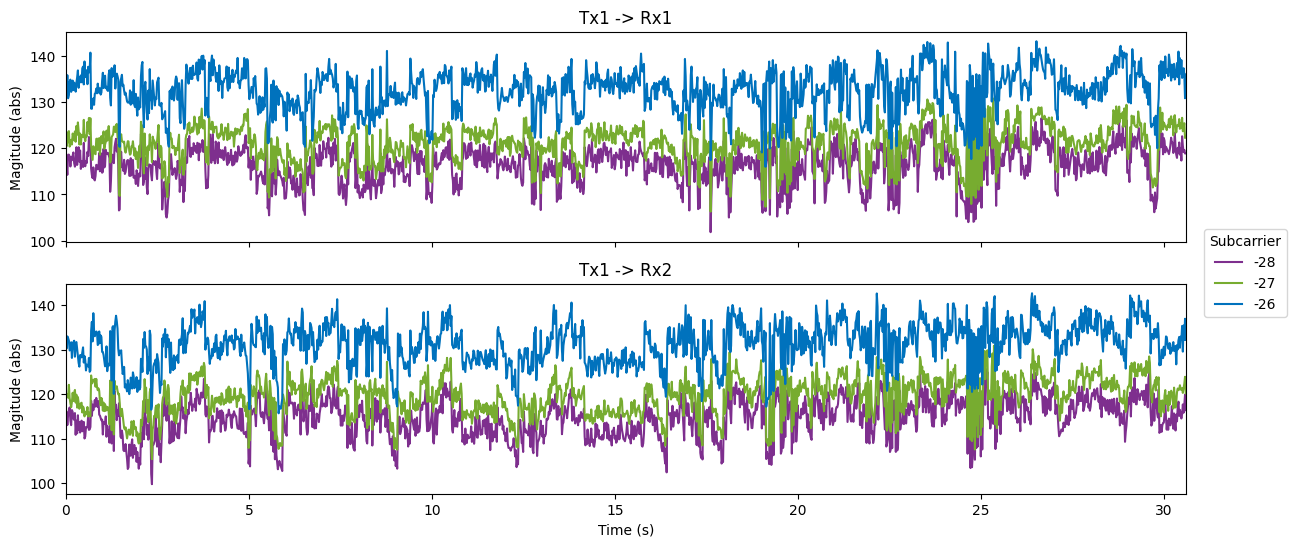

<Figure size 640x480 with 0 Axes>

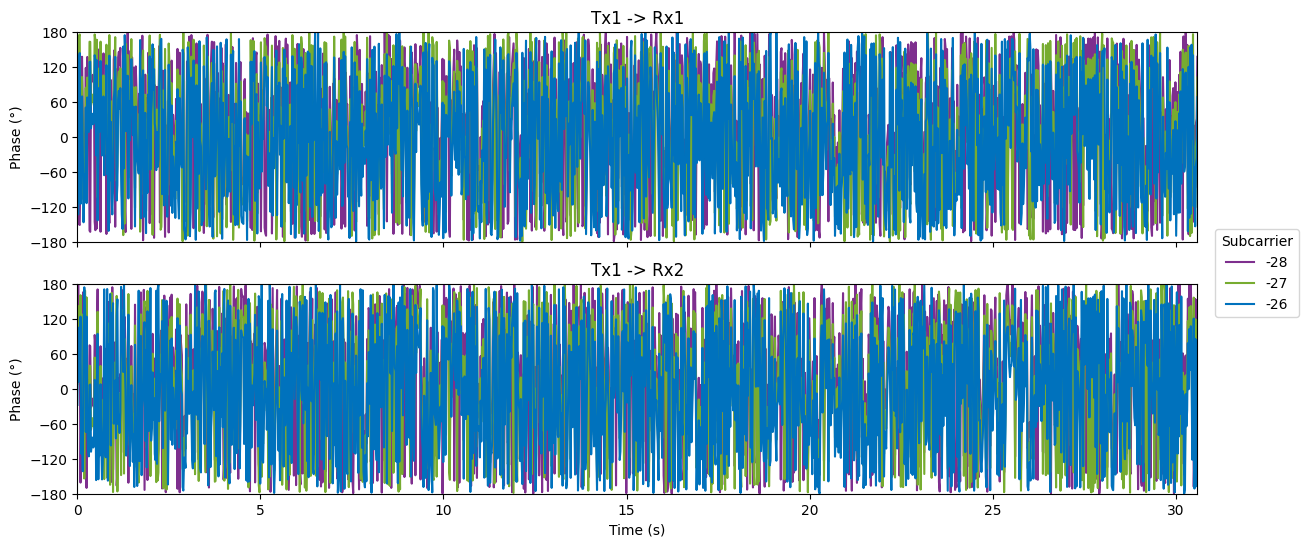

In [7]:
sc_plot = [-28, -26]
sc_plot[1] += 1
scid_plot = [i+SubcarrierIndex[-1] for i in sc_plot]
plt.figure()
fig, axs = plt.subplots(Num_Tx*Num_Rx, 1, sharex='col', sharey='row', figsize=(14,6))#figsize=(14,7)
for sc in range(scid_plot[0], scid_plot[1]): #      -Num_plotTs+1
    for txid in range(Num_Tx):
        for rxid in range(Num_Rx):
            axs[txid*Num_Rx+rxid].plot(Seconds, Mag[:,txid,rxid,sc])
            axs[txid*Num_Rx+rxid].set_title('Tx'+str(txid+1)+' -> Rx'+str(rxid+1))
            axs[txid*Num_Rx+rxid].set_ylabel('Magitude (abs)')
            axs[txid*Num_Rx+Num_Rx-1].set_xlabel('Time (s)')
            axs[txid*Num_Rx+Num_Rx-1].set_xlim([min(Seconds),(max(Seconds))])
fig.legend(labels=[i for i in range(sc_plot[0],sc_plot[1])], loc="right", title = 'Subcarrier')
fig.subplots_adjust(wspace=0.1,hspace=0.2,right=0.925) # left=0.1,bottom=0.1,right=0.9,top=0.9,
fig.show()

plt.figure()
fig, axs = plt.subplots(Num_Tx*Num_Rx, 1, sharex='col', sharey='col', figsize=(14,6))#figsize=(14,7)
for sc in range(scid_plot[0], scid_plot[1]): #      -Num_plotTs+1
    for txid in range(Num_Tx):
        for rxid in range(Num_Rx):
            axs[txid*Num_Rx+rxid].plot(Seconds, Phase[:,txid,rxid,sc])
            axs[txid*Num_Rx+rxid].set_title('Tx'+str(txid+1)+' -> Rx'+str(rxid+1))
            axs[txid*Num_Rx+rxid].set_ylabel('Phase (°)')
            axs[txid*Num_Rx+Num_Rx-1].set_xlabel('Time (s)')
            axs[txid*Num_Rx+Num_Rx-1].set_xlim([min(Seconds),(max(Seconds))])
            axs[txid*Num_Rx+Num_Rx-1].yaxis.set_major_locator(y_major_locator_Pha)# ax=plt.gca()
            axs[txid*Num_Rx+Num_Rx-1].set_ylim([-180, 180])
fig.legend(labels=[i for i in range(sc_plot[0],sc_plot[1])], loc="right", title = 'Subcarrier')
fig.subplots_adjust(wspace=0.1,hspace=0.2,right=0.925) # left=0.1,bottom=0.1,right=0.9,top=0.9,
fig.show()

/tmp/ipykernel_27671/675270379.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

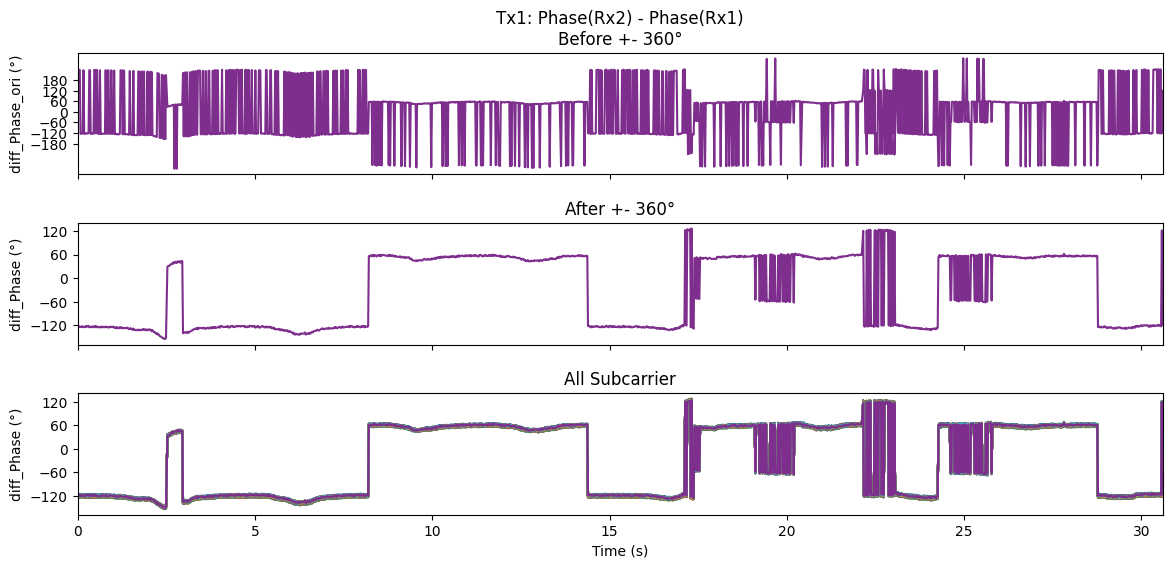

In [8]:
diff_Phase = np.zeros([Num_Ts, Num_Tx, Num_Sc])
for txid in range(Num_Tx):
    diff_Phase[:,txid,:] = Phase[:,txid,1,:] - Phase[:,txid,0,:]
    diff_Phase_ori = diff_Phase.copy()
    for scid in range(Num_Sc):
        temp = diff_Phase[:,txid, scid].copy()
        while np.mean(temp)-np.min(temp)>180:
            n_t_360 = np.where(temp<np.mean(temp)-180)[0]
            diff_Phase[n_t_360,txid, scid] += 360
            temp = diff_Phase[:, txid, scid].copy()
        while np.max(temp)-np.mean(temp)>180:
            n_t_360 = np.where(temp>np.mean(temp)+180)[0]
            diff_Phase[n_t_360,txid, scid] -= 360
            temp = diff_Phase[:,txid, scid].copy()
        ratio_lowlier = np.sum(temp<-180)/temp.size
        ratio_uplier = np.sum(temp>180)/temp.size
        if ratio_lowlier > 0.5:
            diff_Phase[:,txid, scid] += 360
        if ratio_uplier > 0.5:
            diff_Phase[:,txid, scid] -= 360

    plt.figure()
    fig, axs = plt.subplots(3, 1, sharex='col', figsize=(14,6))#figsize=(14,7)
    axs[0].plot(Seconds, diff_Phase_ori[:,txid, 0:1])
    axs[0].set_ylabel('diff_Phase_ori (°)')
    axs[0].yaxis.set_major_locator(y_major_locator_Pha)# ax=plt.gca()
    axs[0].set_title('Tx'+str(txid+1)+': Phase(Rx2) - Phase(Rx1)'+'\nBefore +- 360°')
    axs[1].plot(Seconds, diff_Phase[:,txid, 0:1])
    axs[1].set_ylabel('diff_Phase (°)')
    axs[1].yaxis.set_major_locator(y_major_locator_Pha)# ax=plt.gca()
    axs[1].set_title('After +- 360°')
    axs[2].plot(Seconds, diff_Phase[:,txid, :])
    axs[2].set_ylabel('diff_Phase (°)')
    axs[2].yaxis.set_major_locator(y_major_locator_Pha)# ax=plt.gca()
    axs[2].set_title('All Subcarrier')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_xlim([min(Seconds),(max(Seconds))])
    fig.subplots_adjust(hspace=0.4) # left=0.1,bottom=0.1,right=0.9,top=0.9,
    fig.show()

/tmp/ipykernel_27671/768590275.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

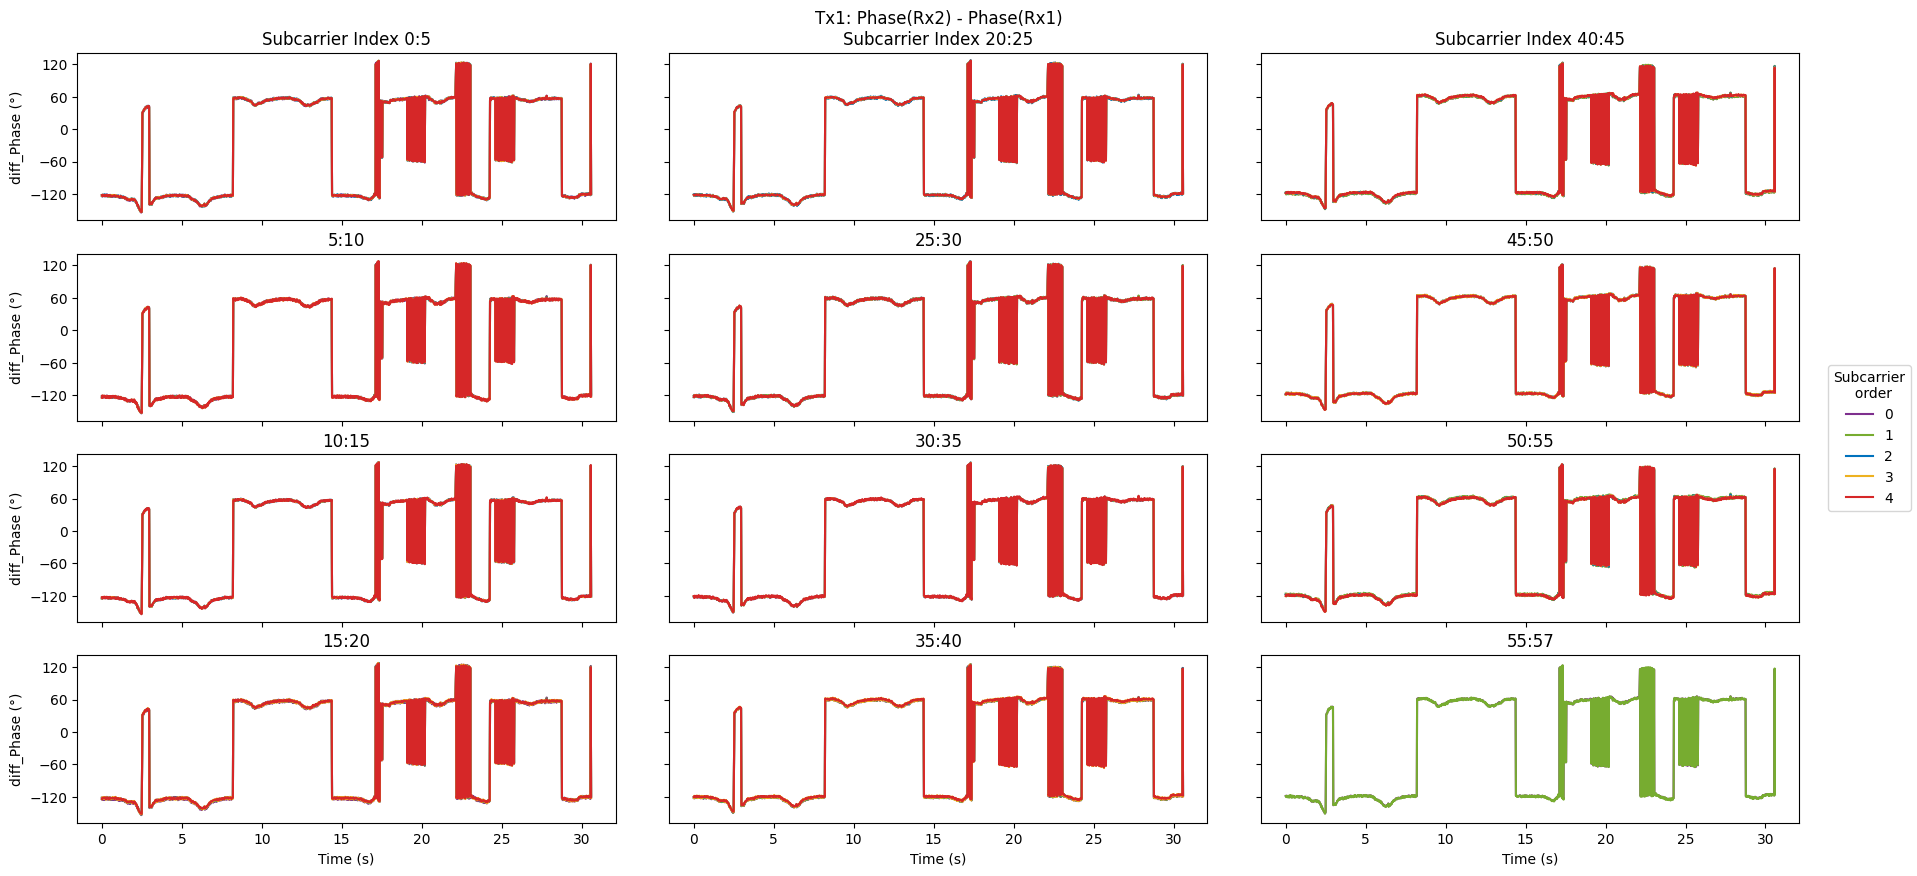

In [9]:
num_sc_plot_ax = 5
row_num, col_cum = 4, 3
for txid in range(Num_Tx):
    plt.figure()
    fig, axs = plt.subplots(row_num, col_cum, sharex='col', sharey='row', figsize=(21,10))#figsize=(14,7)
    for row in range(row_num):
        for col in range(col_cum):
            sc_range = [num_sc_plot_ax * (row_num*col+row), num_sc_plot_ax * (row_num*col+row+1)]
            sc_range[1] = Num_Sc if sc_range[1] > Num_Sc else sc_range[1]
            axs[row, col].plot(Seconds, diff_Phase[:,txid, sc_range[0]:sc_range[1]])
            axs[row, col].set_title(str(sc_range[0]) + ':' + str(sc_range[1]))
            if row == 0:
                axs[row, col].set_title('Subcarrier Index ' + str(sc_range[0]) + ':' + str(sc_range[1]))
                if col == 1:
                    axs[0,1].set_title('Tx'+str(txid+1)+': Phase(Rx2) - Phase(Rx1)' + '\n' + 'Subcarrier Index ' + str(sc_range[0]) + ':' + str(sc_range[1]))
            axs[col_cum, col].set_xlabel('Time (s)')
        axs[row,0].set_ylabel('diff_Phase (°)')
        axs[row,0].yaxis.set_major_locator(y_major_locator_Pha)# ax=plt.gca()
    fig.legend(labels=range(num_sc_plot_ax), loc="right", title = 'Subcarrier\n     order')
    fig.subplots_adjust(wspace=0.1,hspace=0.2,right=0.945) # left=0.1,bottom=0.1,right=0.9,top=0.9,
    fig.show()

